In [3]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   -------------------------------- ------- 9.2/11.3 MB 51.8 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 30.9 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd


In [5]:
train_path = 'train.csv'
test_path = 'test.csv'

In [6]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [7]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [8]:
train_df.head()
train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

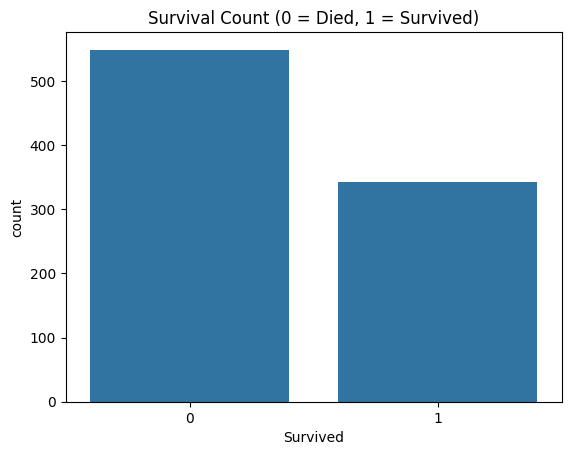

Survival Rate: 38.38%


In [12]:
# Plot class balance
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

# Percentage
survival_rate = train_df['Survived'].mean()
print(f"Survival Rate: {survival_rate:.2%}")


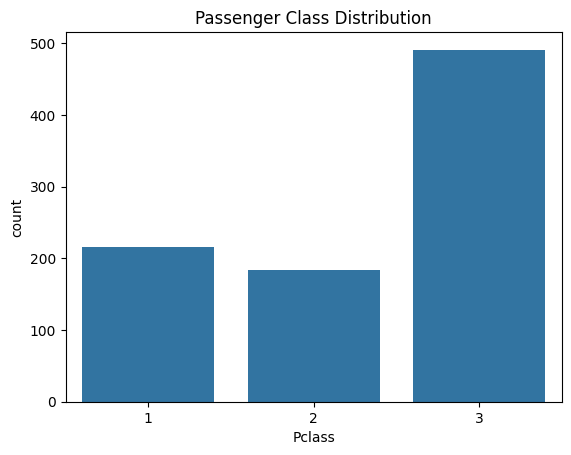

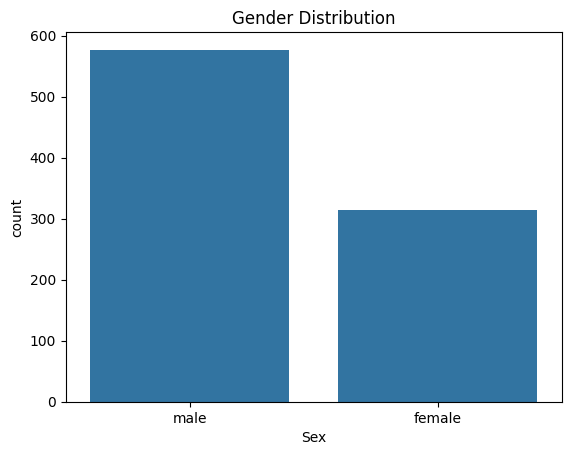

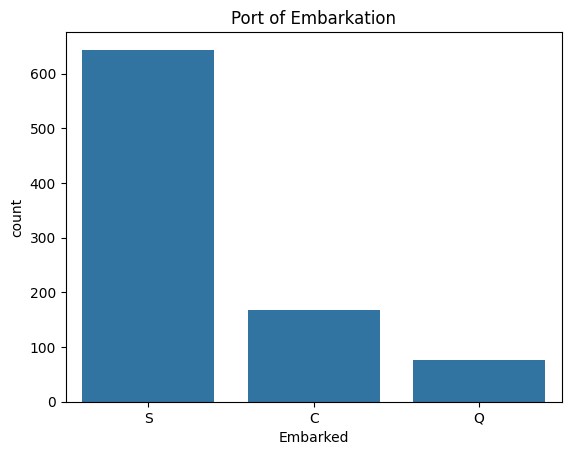

In [13]:
# Pclass
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

# Sex
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.show()

# Embarked
sns.countplot(x='Embarked', data=train_df)
plt.title('Port of Embarkation')
plt.show()


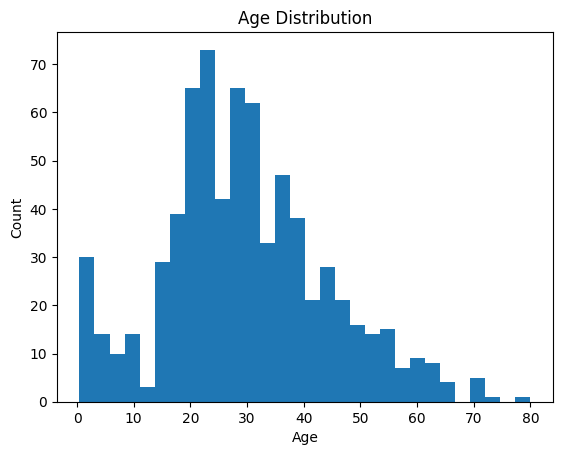

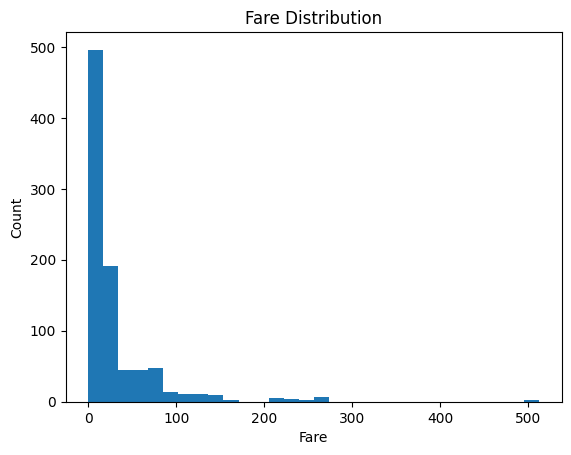

In [14]:
# Age
plt.hist(train_df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare
plt.hist(train_df['Fare'], bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


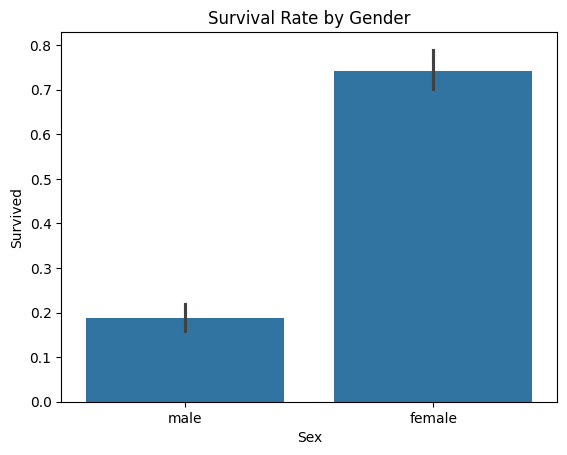

In [15]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


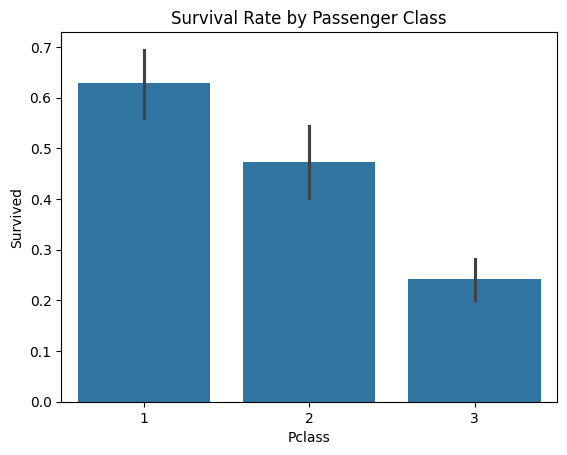

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()


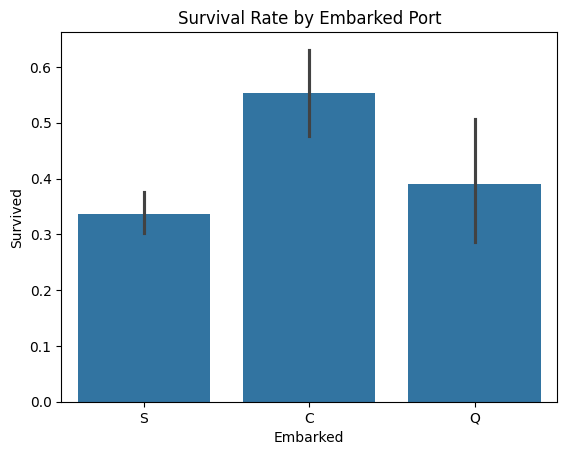

In [17]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked Port')
plt.show()


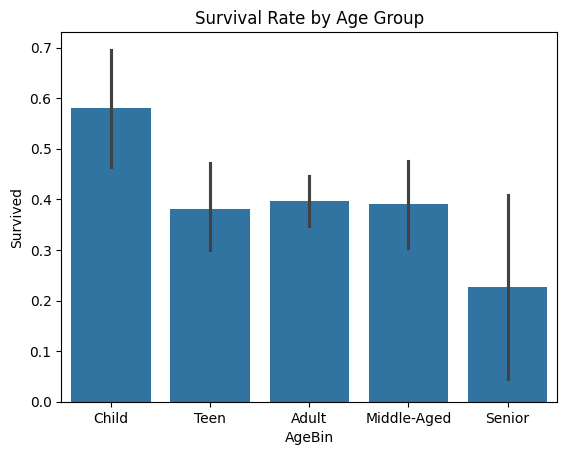

In [18]:
# Create Age bins
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80],
                            labels=['Child','Teen','Adult','Middle-Aged','Senior'])

sns.barplot(x='AgeBin', y='Survived', data=train_df)
plt.title('Survival Rate by Age Group')
plt.show()


In [19]:
# Extract title using regex
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Preview
train_df[['Name', 'Title']].head(10)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [20]:
# Replace similar titles
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
}

train_df['Title'] = train_df['Title'].replace(title_mapping)
test_df['Title'] = test_df['Title'].replace(title_mapping)


In [21]:
# Define rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']

train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')


In [22]:
print(train_df['Title'].value_counts())
print("\n")
print(test_df['Title'].value_counts())


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64


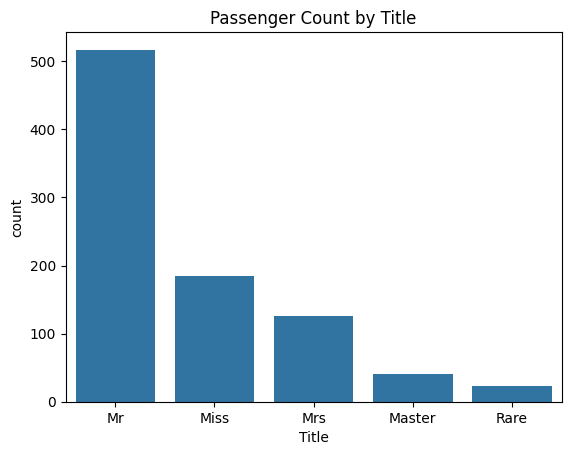

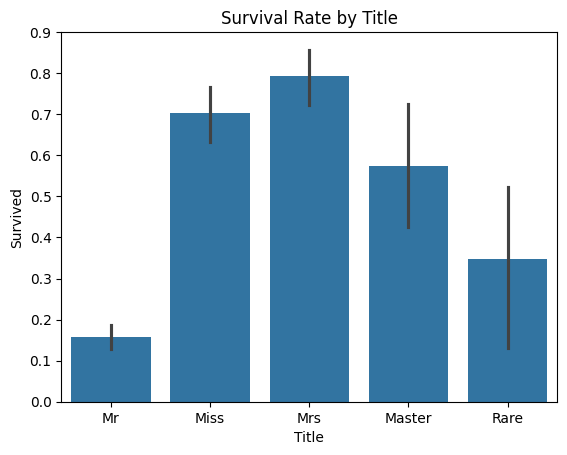

In [23]:
sns.countplot(x='Title', data=train_df, order=train_df['Title'].value_counts().index)
plt.title('Passenger Count by Title')
plt.show()

sns.barplot(x='Title', y='Survived', data=train_df, order=train_df['Title'].value_counts().index)
plt.title('Survival Rate by Title')
plt.show()


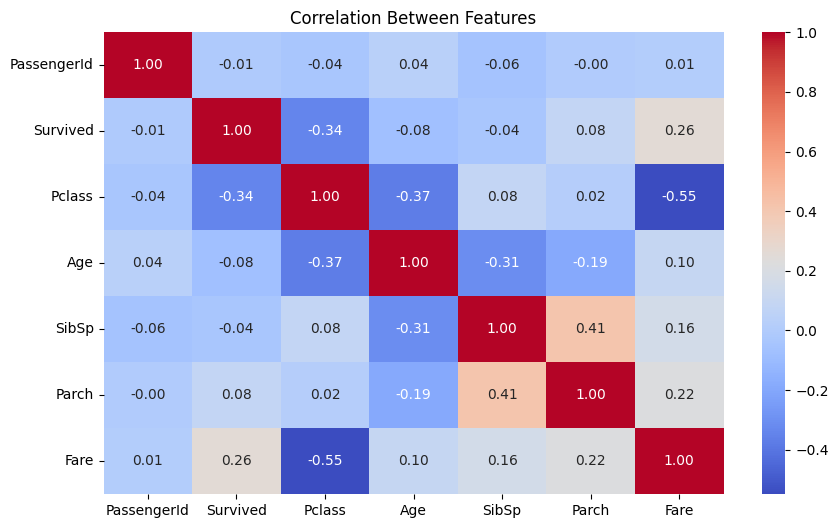

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()


In [25]:
train_df['Age'] = train_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


In [26]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


C:\Users\raghu\AppData\Local\Temp\ipykernel_23952\3873893662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [27]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


C:\Users\raghu\AppData\Local\Temp\ipykernel_23952\3659495238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [28]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


In [29]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


In [30]:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1


In [31]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})


In [32]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_map)
test_df['Embarked'] = test_df['Embarked'].map(embarked_map)


In [33]:
title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
train_df['Title'] = train_df['Title'].map(title_map).fillna(0)
test_df['Title'] = test_df['Title'].map(title_map).fillna(0)


In [34]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_passenger_ids = test_df['PassengerId']  # keep for submission
test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [35]:
train_df.drop(columns=['AgeBin'], inplace=True)


In [36]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on validation set
y_pred = lr_model.predict(X_val)

# Accuracy
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.7933

Confusion Matrix:
[[87 18]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on validation set
rf_preds = rf_model.predict(X_val)

# Accuracy
print(f"Validation Accuracy (RF): {accuracy_score(y_val, rf_preds):.4f}")

# Confusion Matrix
print("\nConfusion Matrix (RF):")
print(confusion_matrix(y_val, rf_preds))

# Classification Report
print("\nClassification Report (RF):")
print(classification_report(y_val, rf_preds))


Validation Accuracy (RF): 0.8492

Confusion Matrix (RF):
[[93 12]
 [15 59]]

Classification Report (RF):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [41]:
pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 2.1/149.9 MB 39.0 MB/s eta 0:00:04
    --------------------------------------- 2.1/149.9 MB 39.0 MB/s eta 0:00:04
    --------------------------------------- 2.6/149.9 MB 4.3 MB/s eta 0:00:35
    --------------------------------------- 2.9/149.9 MB 3.4 MB/s eta 0:00:44
   - -------------------------------------- 7.3/149.9 MB 7.1 MB/s eta 0:00:21
   -- ------------------------------------- 9.4/149.9 MB 7.9 MB/s eta 0:00:18
   -- ------------------------------------- 10.2/149.9 MB 7.1 MB/s eta 0:00:20
   ---- ----------------------------------- 15.7/149.9 MB 9.3 MB/s eta 0:00:15
   ------ --------------------------------- 26.0/149.9 MB 13.9 MB/s eta 0:00:09
   ------- -------------------------------- 26.5/149.9 MB 12.7 MB/s eta 0:00:10
   -------- ------------------------------- 30.7/149.9 MB 13.1 MB/s eta 0:00:10
   ---------- ----------------------------- 41.2/149.9 MB 16.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


c:\Users\raghu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:33:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [43]:
# Predict on validation set
xgb_preds = xgb_model.predict(X_val)

# Accuracy
print(f"Validation Accuracy (XGBoost): {accuracy_score(y_val, xgb_preds):.4f}")

# Confusion Matrix
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_val, xgb_preds))

# Classification Report
print("\nClassification Report (XGBoost):")
print(classification_report(y_val, xgb_preds))


Validation Accuracy (XGBoost): 0.8547

Confusion Matrix (XGBoost):
[[91 14]
 [12 62]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       105
           1       0.82      0.84      0.83        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179



In [48]:
import pickle

# Save
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Load
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)


In [45]:
pip install gradio

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/59.7 MB ? eta -:--:--
   ---- ----------------------------------- 7.3/59.7 MB 50.6 MB/s eta 0:00:02
   -------- ------------------------------- 12.6/59.7 MB 35.9 MB/s eta 0:00:02
   ---------- ----------------------------- 15.7/59.7 MB 28.3 MB/s eta 0:00:02
   ---------------- ----------------------- 25.2/59.7 MB 32.6 MB/s eta 0:00:02
   ----------------------- ---------------- 34.3/59.7 MB 34.6 MB/s eta 0:00:01
   ------------------------------ --------- 46.1/59.7 MB 38.6 MB/s eta 0:00:01
   ------------------------------- -------- 46.9/59.7 MB 33.2 MB/s eta 0:00:01
   ----------------------------------- ---- 52.4/59.7 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------  58.7/59.7 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------  59.5/59.7 MB 29.9 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import gradio as gr
import pandas as pd
import joblib

# Load the trained XGBoost model
model = joblib.load("xgb_model.pkl")

# Function to preprocess input and predict
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked, title):
    # Encode sex
    sex_encoded = 1 if sex.lower() == "female" else 0

    # Encode embarked
    embarked_map = {'S': 0, 'C': 1, 'Q': 2}
    embarked_encoded = embarked_map.get(embarked.upper(), 0)

    # ✅ Encode title (MUST match how you trained your model)
    title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
    title_encoded = title_map.get(title, 0)  # fallback to 'Mr' (0) if unknown

    # Feature engineering
    family_size = sibsp + parch + 1
    is_alone = 1 if family_size == 1 else 0

    # Prepare input data in same format/order as training
    input_data = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex_encoded,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked': embarked_encoded,
        'Title': title_encoded,
        'FamilySize': family_size,
        'IsAlone': is_alone
    }])

    # Predict
    prediction = model.predict(input_data)[0]
    return "✅ Survived" if prediction == 1 else "❌ Did Not Survive"



# Define the Gradio interface
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
    gr.Dropdown([1, 2, 3], label="Passenger Class (Pclass)"),
    gr.Dropdown(["male", "female"], label="Sex"),
    gr.Number(label="Age"),
    gr.Number(label="Number of Siblings/Spouses Aboard (SibSp)"),
    gr.Number(label="Number of Parents/Children Aboard (Parch)"),
    gr.Number(label="Fare Paid"),
    gr.Dropdown(["S", "C", "Q"], label="Port of Embarkation (Embarked)"),
    gr.Dropdown(["Mr", "Miss", "Mrs", "Master", "Rare"], label="Title")
],


    outputs=gr.Text(label="Prediction"),
    title="🚢 Titanic Survival Predictor",
    description="Enter passenger details below to predict whether they survived the Titanic disaster.",
    theme="default"
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
